# Project 2: Ames Housing Predicition
___________________________________________________________________________________________________________________________

## Preprocessing and Features Engineering

### Contents:
01_EDA_and_Cleaning.ipynb<br>
**02_Preprocessing.ipynb** (Current Notebook)<br>
|   |__ a__ [Libraries](#Libraries)<br>
|   |__ b__ [Data Cleaning](#Data-Cleaning)<br>
|   |__ c__ [Correlation Heatmap of Train Dataset](#Correlation-Heatmap-of-Cleaned-Train-Dataset)<br>
|   |__ d__ [Preprocessing of Test Dataset](#Preprocessing-Test-Dataset)<br>
|   |__ d__ [Feature Visualisation of Preprocessed Features](#Scatterplot-of-Cleaned-Data)<br>
03_Feature_Engineering_and_Model_Benchmarks.ipynb<br>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

#editting of setting to view all columns and rows within the dataset
pd.options.display.max_columns = None 
#There are 80+ columns withing the dataframe, this setting is required if you want to view the entire columns in the dataframe.
pd.options.display.max_rows = None

In [2]:
data = pd.read_csv("../datasets/train.csv")

In [3]:
data.columns = data.columns.str.lower().str.replace(" ", "")
data.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Data Cleaning

In [4]:
#specific cleaning to train dataset.

# 1. Correcting the typo error of garageyrblt
data.loc[1699, 'garageyrblt'] = 2007
data.loc[1699, 'garageyrblt']

# 2. Logic error: Yr sold is earlier than yeay built
data.drop(index=1885,inplace=True)
data.drop(index=1003,inplace=True)

In [5]:
#As it contains one of the most null values and it is the only single feature among the dataset
#Alley, garage cars, fence, miscfeature will be dropped 
#Note: this should only done for this data set, for other testing, we should consider changing the rating instead.
data.drop(columns = ["alley", 'garagecars', 'fence', 'miscfeature'], inplace=True)

In [6]:
#Standardising all features with similar rating 
#Range was given to be 5 to -5 as these features are considered basic necessity of a housing
for i in ['exterqual','extercond','kitchenqual', 'heatingqc']:
    data[i] = data[i].map({'Ex':5,'Gd':2.5,'TA':0,'Fa':-2.5,'Po':-5})

In [7]:
#lot Related
data['lotfrontage'] = data['lotfrontage'].fillna(0.0)
data['lotarea'] = data['lotarea'].fillna(0.0)
data['lotshape'] = data['lotshape'].fillna("None")

In [8]:
#Garage Related
data['garagetype'] = data['garagetype'].fillna('None')
data['garagefinish'] = data['garagefinish'].fillna('None')
data['garagequal'] = data['garagequal'].fillna('None')
data['garagecond'] = data['garagecond'].fillna('None')
data['garageyrblt'] = data['garageyrblt'].fillna(data["yearbuilt"])
data["garagecars"] = data['lotfrontage'].fillna(0.0)
#filling null values with mean of overall garage area for those who have garage but area reflects as null
data['garagearea'] = data['garagearea'].fillna(data['garagearea'].mean())

#Standardising all features with similar rating
#Range was given to be 5 to 0 as these features are considered additional bonus to the housing
for i in ['garagequal','garagecond']:
    data[i] = data[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'None':0})

In [9]:
#Basement Related
data['bsmtqual'] = data['bsmtqual'].fillna('None')
data['bsmtcond'] = data['bsmtcond'].fillna('None')
data['bsmtexposure'] = data['bsmtexposure'].fillna('None')
data['bsmtfintype1'] = data['bsmtfintype1'].fillna('None')
data['bsmtfintype2'] = data['bsmtfintype2'].fillna('None')
data["bsmtfinsf1"] = data["bsmtfinsf1"].fillna(0.0)
data["bsmtfinsf2"] = data["bsmtfinsf2"].fillna(0.0)
data["bsmtfullbath"] = data["bsmtfullbath"].fillna(0)
data["bsmthalfbath"] = data["bsmthalfbath"].fillna(0)
data["totalbsmtsf"] = data["totalbsmtsf"].fillna(0.0)
data["bsmtunfsf"] = data["bsmtunfsf"].fillna(0.0)

#Similar to Garage, the presence of basement is considered additional features to housing so it will carry a postive rating
for i in ['bsmtqual','bsmtcond']:
    data[i] = data[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'None':0})
data['bsmtexposure'] = data['bsmtexposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

In [10]:
#Other Features
data['fireplacequ'] = data['fireplacequ'].fillna('None')
data['poolqc'] = data['poolqc'].fillna('None')

data['fireplacequ'] = data['fireplacequ'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
data['poolqc'] = data['poolqc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})

In [11]:
data['masvnrtype'] = data['masvnrtype'].fillna('None')
data['masvnrarea'] = data['masvnrarea'].fillna(0)

In [12]:
# Changing to apporperiate dtype MSSubClass is categorical but was coded as numeric. 
# Convert to dtype object.
data['mssubclass'] = data['mssubclass'].astype(str)

In [13]:
#combining baths as one column to with full bath and half bath taking the value of 1 and 0.5
#this will provide a better correlation to the sale price
data["totalbath"] = data["fullbath"] + (0.5 * data['halfbath'])
data["bsmttotalbath"] = data["bsmtfullbath"] + (0.5 * data['bsmthalfbath'])
data.drop(columns = ["fullbath", 'halfbath', 'bsmtfullbath', 'bsmthalfbath'], inplace =True)

In [14]:
# to indicate the blt age and when it was last remodelled
data['bltage'] = data['yearbuilt'] - data['yearbuilt']
data['lastremod'] = 2020 - data['yearremod/add']

In [15]:
data = pd.get_dummies(data, columns=['mssubclass', 'mszoning', 'street',
                                     'lotshape', 'landcontour',
                                     'utilities', 'lotconfig', 'landslope',
                                     'neighborhood', 'condition1', 'condition2',
                                     'bldgtype', 'housestyle',
                                     'roofstyle', 'roofmatl',
                                     'exterior1st', 'exterior2nd',
                                     'masvnrtype', 'foundation', 'paveddrive',
                                     'bsmtfintype1', 'bsmtfintype2',
                                     'heating', 'electrical', 'functional',
                                     'garagetype', 'garagefinish', 'centralair',
                                     'saletype', 'mosold', 'yrsold'], drop_first=True)

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.head()

,id,pid,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garageyrblt,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,miscval,saleprice,garagecars,totalbath,bsmttotalbath,bltage,lastremod,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,utilities_NoSewr,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,paveddrive_P,paveddrive_Y,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_None,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,garagefinish_None,garagefinish_RFn,garagefinish_Unf,centralair_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,mosold_2,mosold_3,mosold_4,mosold_5,mosold_6,mosold_7,mosold_8,mosold_9,mosold_10,mosold_11,mosold_12,yrsold_2007,yrsold_2008,yrsold_2009,yrsold_2010
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,2.5,0.0,3,3,0,533.0,0.0,192.0,725.0,5.0,725,754,0,1479,3,1,2.5,6,0,0.0,1976.0,475.0,3,3,0,44,0,0,0,0,0,0,130500,0.0,2.5,0.0,44,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,

In [18]:
data.shape

(2049, 244)

### Correlation Heatmap of Cleaned Train Dataset

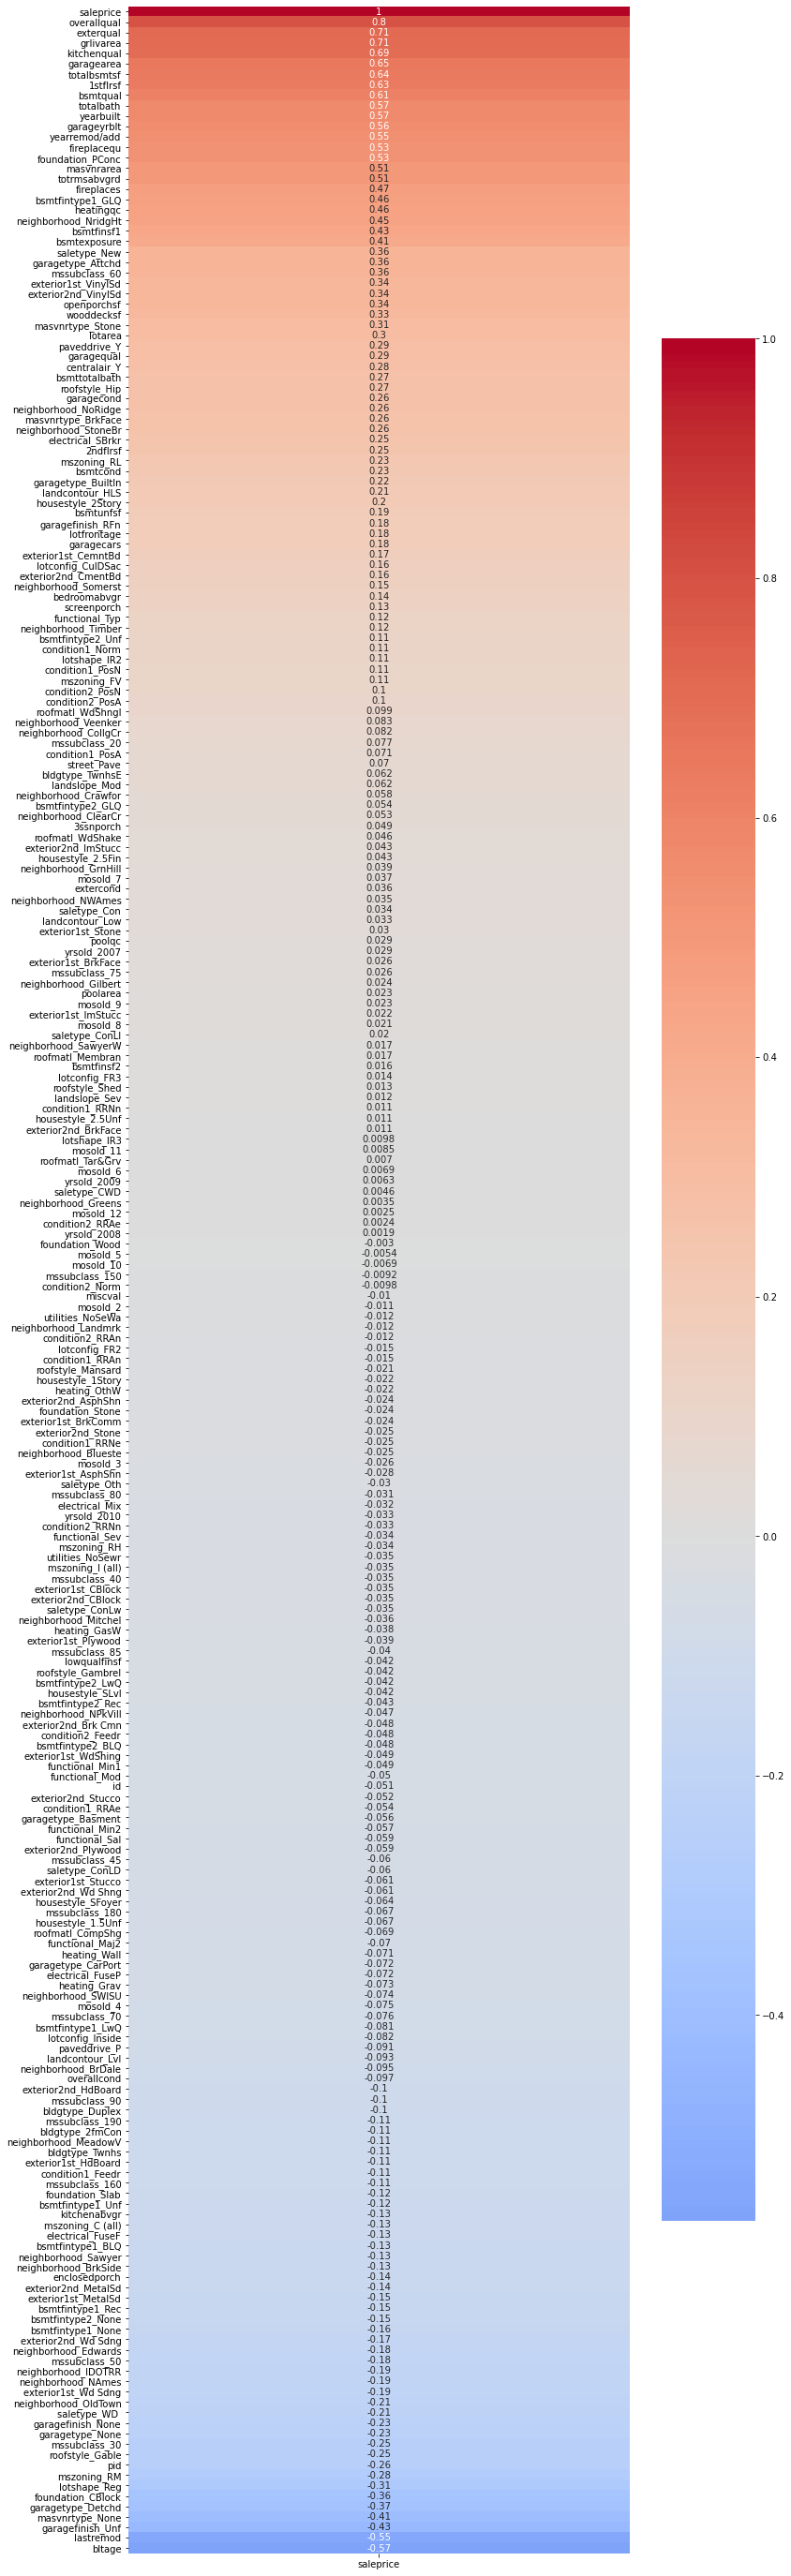

In [19]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(data.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='coolwarm', center=0);

### Preprocessing Test Dataset

Using the preprocessing method, a function was created for a one step cleaning and preprocessing for subsequent dataset.<br>
In this project, the test dataset was cleaned and preprocessed.<br>

In [20]:
#Import test data
test = pd.read_csv('../datasets/test.csv')

#Check size of test set.  We see there are 879 houses in the test set.
test.shape

(879, 80)

In [21]:
def processing(data):
    data.columns = data.columns.str.lower().str.replace(" ", "")
    data.drop(columns = ["alley", 'garagecars', 'fence', 'miscfeature'], inplace=True)
    
    #Standardising all features with similar rating 
    #Range was given to be 5 to -5 as these features are considered basic necessity of a housing
    for i in ['exterqual','extercond','kitchenqual', 'heatingqc']:
        data[i] = data[i].map({'Ex':5,'Gd':2.5,'TA':0,'Fa':-2.5,'Po':-5})
        
    #lot Related
    data['lotfrontage'] = data['lotfrontage'].fillna(0.0)
    data['lotarea'] = data['lotarea'].fillna(0.0)
    data['lotshape'] = data['lotshape'].fillna("None")
    
    #Garage Related
    data['garagetype'] = data['garagetype'].fillna('None')
    data['garagefinish'] = data['garagefinish'].fillna('None')
    data['garagequal'] = data['garagequal'].fillna('None')
    data['garagecond'] = data['garagecond'].fillna('None')
    data['garageyrblt'] = data['garageyrblt'].fillna(data["yearbuilt"])
    data["garagecars"] = data['lotfrontage'].fillna(0.0)
    #filling null values with mean of overall garage area for those who have garage but area reflects as null
    data['garagearea'] = data['garagearea'].fillna(data['garagearea'].mean())
    #Standardising all features with similar rating
    #Range was given to be 5 to 0 as these features are considered additional bonus to the housing
    for i in ['garagequal','garagecond']:
        data[i] = data[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'None':0})
        
    #Basement Related
    data['bsmtqual'] = data['bsmtqual'].fillna('None')
    data['bsmtcond'] = data['bsmtcond'].fillna('None')
    data['bsmtexposure'] = data['bsmtexposure'].fillna('None')
    data['bsmtfintype1'] = data['bsmtfintype1'].fillna('None')
    data['bsmtfintype2'] = data['bsmtfintype2'].fillna('None')
    data["bsmtfinsf1"] = data["bsmtfinsf1"].fillna(0.0)
    data["bsmtfinsf2"] = data["bsmtfinsf2"].fillna(0.0)
    data["bsmtfullbath"] = data["bsmtfullbath"].fillna(0)
    data["bsmthalfbath"] = data["bsmthalfbath"].fillna(0)
    data["totalbsmtsf"] = data["totalbsmtsf"].fillna(0.0)
    data["bsmtunfsf"] = data["bsmtunfsf"].fillna(0.0)
    #Similar to Garage, the presence of basement is considered additional features to housing so it will carry a postive rating
    for i in ['bsmtqual','bsmtcond']:
        data[i] = data[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'None':0})
    data['bsmtexposure'] = data['bsmtexposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    
    #Other Features
    data['fireplacequ'] = data['fireplacequ'].fillna('None')
    data['poolqc'] = data['poolqc'].fillna('None')
    #Standardising all features with similar rating
    data['fireplacequ'] = data['fireplacequ'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['poolqc'] = data['poolqc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})
    
    # other processing
    # Changing to apporperiate dtype MSSubClass is categorical but was coded as numeric. 
    # Convert to dtype object.
    data['mssubclass'] = data['mssubclass'].astype(str)
    
    data['masvnrtype'] = data['masvnrtype'].fillna('None')
    data['masvnrarea'] = data['masvnrarea'].fillna(0)
    
    #combining baths as one column to with full bath and half bath taking the value of 1 and 0.5
    #this will provide a better correlation to the sale price
    data["totalbath"] = data["fullbath"] + (0.5 * data['halfbath'])
    data["bsmttotalbath"] = data["bsmtfullbath"] + (0.5 * data['bsmthalfbath'])
    data.drop(columns = ["fullbath", 'halfbath', 'bsmtfullbath', 'bsmthalfbath'], inplace =True)
    
    # to indicate the blt age and when it was last remodelled
    data['bltage'] = 2020 - data['yearbuilt']
    data['lastremod'] = 2020 - data['yearremod/add']
    
    data = pd.get_dummies(data, columns=['mssubclass', 'mszoning', 'street',
                                     'lotshape', 'landcontour',
                                     'utilities', 'lotconfig', 'landslope',
                                     'neighborhood', 'condition1', 'condition2',
                                     'bldgtype', 'housestyle',
                                     'roofstyle', 'roofmatl',
                                     'exterior1st', 'exterior2nd',
                                     'masvnrtype', 'foundation', 'paveddrive',
                                     'bsmtfintype1', 'bsmtfintype2',
                                     'heating', 'electrical', 'functional',
                                     'garagetype', 'garagefinish', 'centralair',
                                     'saletype', 'mosold', 'yrsold'], drop_first=True)
    return data

In [22]:
test = processing(test)

#### Removal of features that does not have any impact on predictions

Removal of some of the features that exist only on either of the dataset as these features does not have any major impact towards the prediction.

In [23]:
#these features from "train" dataset will be dropped as it does not have any impact towards the prediction.
#less saleprice which will be used later in the prediction
data.columns.difference(test.columns)

Index(['condition2_Feedr', 'condition2_RRAe', 'condition2_RRAn',
       'condition2_RRNn', 'electrical_Mix', 'exterior1st_CBlock',
       'exterior1st_ImStucc', 'exterior1st_Stone', 'exterior2nd_Stone',
       'functional_Sal', 'functional_Sev', 'heating_OthW', 'heating_Wall',
       'mssubclass_150', 'mszoning_C (all)', 'neighborhood_GrnHill',
       'neighborhood_Landmrk', 'roofmatl_CompShg', 'roofmatl_Membran',
       'saleprice', 'utilities_NoSeWa'],
      dtype='object')

In [24]:
#these features from "test" dataset will be dropped as it does not have any impact towards the prediction.
test.columns.difference(data.columns)

Index(['exterior1st_PreCast', 'exterior2nd_Other', 'exterior2nd_PreCast',
       'heating_GasA', 'masvnrtype_CBlock', 'roofmatl_Metal', 'roofmatl_Roll',
       'saletype_VWD'],
      dtype='object')

In [25]:
test.drop(['exterior1st_PreCast', 'exterior2nd_Other', 
           'exterior2nd_PreCast', 'heating_GasA', 
           'masvnrtype_CBlock', 'roofmatl_Metal', 
           'roofmatl_Roll','saletype_VWD'], 
          axis=1, inplace=True)

In [26]:
#No null value after applying to function
test.isnull().sum().sum()

0

In [27]:
#moving the cleaned data into a new csv file for prediction later
test.to_csv("../datasets/test_clean.csv", index=False)

In [28]:
 data.drop(columns = ['condition2_Feedr', 'condition2_RRAe', 
                      'condition2_RRAn', 'condition2_RRNn', 
                      'electrical_Mix', 'exterior1st_CBlock',
                      'exterior1st_ImStucc', 'exterior1st_Stone', 
                      'exterior2nd_Stone','functional_Sal', 
                      'functional_Sev', 'heating_OthW', 
                      'heating_Wall', 'mssubclass_150', 
                      'mszoning_C (all)', 'neighborhood_GrnHill',
                      'neighborhood_Landmrk', 'roofmatl_CompShg', 
                      'roofmatl_Membran', 'utilities_NoSeWa'], inplace=True)

In [29]:
#moving the cleaned data into a new csv file for prediction later
data.to_csv("../datasets/train_clean.csv", index = False)

In [37]:
data.shape, test.shape

((2049, 224), (879, 223))

In [33]:
# splitting the categorical and numerical data to faciliate better visualisation during EDA
#selecting all non-object d-types as it is all numerical
num_cols = data.select_dtypes(exclude=['object']).columns

#### Scatterplot of Cleaned Data

After processing, there are features with better correlation to the saleprice (e.g. overallqual, bltage, total bathroom of house and basement)

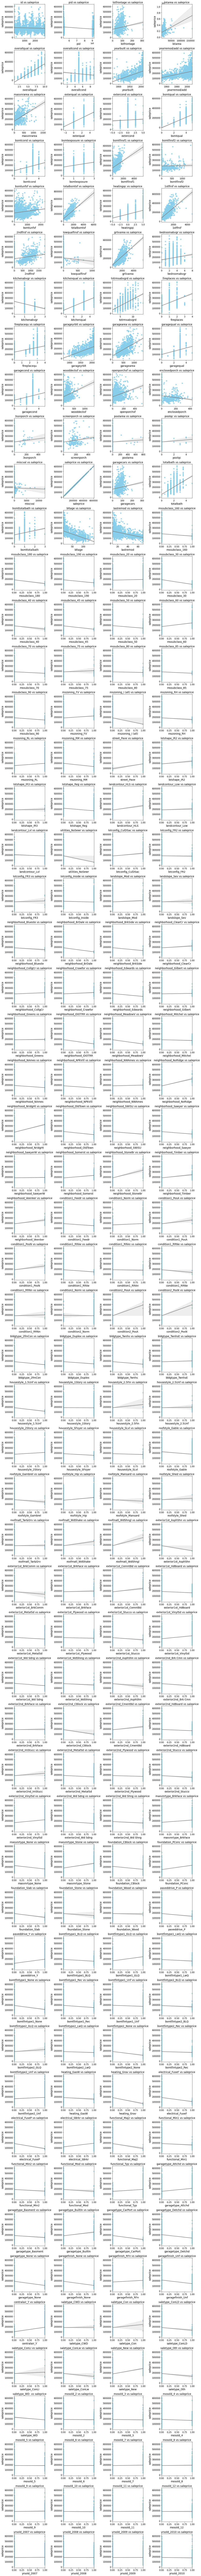

In [40]:
# scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, pos = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    pos = pos.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=pos[i], \
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},
                    line_kws = {'color':'grey'})
        pos[i].set_title(f'{column} vs saleprice',fontsize=14)  
        pos[i].tick_params(labelsize=12)
        pos[i].set_xlabel(column, fontsize=14)
        pos[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
subplot_scatter(data, num_cols)
#plt.savefig('../images/scatterplot_num.png')